In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from scipy.sparse import hstack, csr_matrix
from statsmodels.tools.tools import add_constant
from utils import load_imdb
from altair import Chart

# Functions

In [2]:
def clean(x):
    if x == 'x':
        return 1
    elif x == 'o':
        return -1
    elif x == 'b':
        return 0
    elif x == 'positive':
        return 1
    else:
        return 0

def update_weights(weights, X_train, y_train, t):
    alpha = 100
    
    y_est = 1 / (1 + np.exp(-np.dot(weights, X_train)))
    step = alpha * (y_train - y_est) * X_train
    updated_weights = weights + step / (t+1)
    
    return updated_weights

def calculate_likelihood(weights, X_train, y_train):
    likelihood = 0
    for features, label in zip(X_train, y_train):
        k = np.dot(weights, features)
        likelihood += label * k - np.log(1+np.exp(k))
        
    return likelihood

# Load Data

In [3]:
data = pd.read_csv('tic-tac-toe.data', header=None)
data = data.applymap(clean)

X_train = data[np.arange(9)].values
y_train = data[9].values

shuffle = np.random.permutation(len(y_train))
X_train = X_train[shuffle]
y_train = y_train[shuffle]

X_train = add_constant(X_train) #Bias term

# Stochastic Gradient Descent

In [4]:
weights = np.ones(X_train.shape[1])
ws = np.zeros(X_train.shape)

initial_likelihood = calculate_likelihood(weights, X_train, y_train)
likelihoods = [initial_likelihood]
for i in range(2):
    for j in range(X_train.shape[0]):
        t = X_train.shape[0]*i + j
        weights = update_weights(weights, X_train[j], y_train[j], t)

        likelihood = calculate_likelihood(weights, X_train, y_train)
        likelihoods.append(likelihood)
        
    shuffle = np.random.permutation(len(y_train))
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]

# Results

In [5]:
W = weights #Last iteration of weights

y_est = 1 / (1 + np.exp(-np.dot(X_train, W)))
y_est[y_est<0.5] = 0
y_est[y_est>=0.5] = 1

errors = np.absolute(y_train-y_est)
accuracy = 1 - sum(errors) / len(y_train)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9832985386221295


In [6]:
data = pd.DataFrame(likelihoods)
data[1] = data.index
data.columns = ['Likelihood', 'Round']

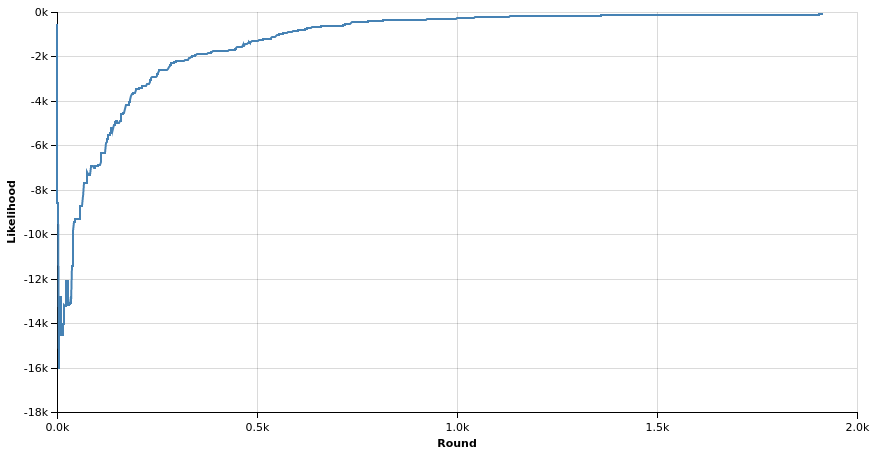

In [7]:
chart = Chart(data).mark_line().encode(x='Round:Q', y='Likelihood:Q')
chart.configure_cell(height=400, width=800)